In [1]:
import requests
from bs4 import BeautifulSoup as BS
import concurrent.futures

In [2]:
import collections

In [89]:
import matplotlib.pyplot as plt

In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

In [66]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
ListURL =[]
shapedList = []
bodyDataList =[]

In [4]:
# ListURL.clear()
# shapedList.clear()
# bodyDataList.clear()

In [5]:
def UrlCall():
    mainURL = input("Enter the URL : ")
    ListURL.append(mainURL)
    URLListCreator()

In [6]:
print(len(ListURL))
print(len(shapedList))

0
0


In [7]:
def URLListCreator():
    Validation = input("Want to Enter URL : Y/N or YES/NO")
    if(Validation.upper() == "Y" or Validation.upper() == "YES" ):
        UrlCall()
        
    else:
        print("Start Work")

In [8]:
URLListCreator()

# https://en.wikipedia.org/wiki/Ayurveda#:~:text=Ayurveda%20(%2F%CB%8C%C9%91%CB%90j%CA%8A%C9%99r,the%20population%20report%20using%20ayurveda.
# https://www.tutorialspoint.com/python_web_scraping/python_web_scraping_getting_started_with_python.htm

Want to Enter URL : Y/N or YES/NO Y
Enter the URL :  https://en.wikipedia.org/wiki/Ayurveda#:~:text=Ayurveda%20(%2F%CB%8C%C9%91%CB%90j%CA%8A%C9%99r,the%20population%20report%20using%20ayurveda.
Want to Enter URL : Y/N or YES/NO y
Enter the URL :  https://www.tutorialspoint.com/python_web_scraping/python_web_scraping_getting_started_with_python.htm
Want to Enter URL : Y/N or YES/NO n


Start Work


In [9]:
for i in range(0,len(ListURL)):
    Validlink = requests.get(ListURL[i])
    print(Validlink)                                        #Check Link Validation
    print("----Summary Space----")                          #Generate Space     
    print()
    print()
    print()
    soup = BS(Validlink.content, 'html.parser')
    shapedData = list(soup.children)
    print(len(shapedData))
    for j in range(0,len(shapedData)):
        print('New',str(type(shapedData[j])))
        if(str(type(shapedData[j])) == '''<class 'bs4.element.Tag'>'''):
          print("Count New")
          shapedList.append(shapedData[j])
            

# NOTE :::  Data is Stored in the form of List for operation we have to convert it again into bytes to perform the opration 

<Response [200]>
----Summary Space----



3
New <class 'bs4.element.Doctype'>
New <class 'bs4.element.NavigableString'>
New <class 'bs4.element.Tag'>
Count New
<Response [200]>
----Summary Space----



4
New <class 'bs4.element.Doctype'>
New <class 'bs4.element.NavigableString'>
New <class 'bs4.element.Tag'>
Count New
New <class 'bs4.element.NavigableString'>


In [18]:
bodyDataList.clear()

In [19]:
len(bodyDataList)

0

In [21]:
for i in range(0,len(shapedList)):
    mainBodyData = shapedList[i].find_all('p')
    bodyDataList.append(mainBodyData)
    print(bodyDataList)
    print()
    print()
    print()
    print()
    print()
    print()

[[<p class="mw-empty-elt">
</p>, <p><b>Traditional</b>
</p>, <p><b>Ayurveda</b> (<span class="rt-commentedText nowrap"><span class="IPA nopopups noexcerpt" lang="en-fonipa"><a href="/wiki/Help:IPA/English" title="Help:IPA/English">/<span style="border-bottom:1px dotted"><span title="/ˌ/: secondary stress follows">ˌ</span><span title="/ɑː/: 'a' in 'father'">ɑː</span><span title="/j/: 'y' in 'yes'">j</span><span title="/ʊər/: 'our' in 'tour'">ʊər</span><span title="/ˈ/: primary stress follows">ˈ</span><span title="'v' in 'vie'">v</span><span title="/eɪ/: 'a' in 'face'">eɪ</span><span title="'d' in 'dye'">d</span><span title="/ə/: 'a' in 'about'">ə</span></span>,<span class="wrap"> </span>-<span style="border-bottom:1px dotted"><span title="/ˈ/: primary stress follows">ˈ</span><span title="'v' in 'vie'">v</span><span title="/iː/: 'ee' in 'fleece'">iː</span></span>-/</a></span></span>; <a class="mw-redirect" href="/wiki/IAST" title="IAST">IAST</a>: <i><span title="International Alphabet of

Word Frequency in  1  link provided to me

[('ayurveda', 101), ('ayurvedic', 59), ('medicine', 46), ('india', 32), ('indian', 25), ('also', 24), ('century', 20), ('used', 17), ('lead', 17), ('found', 17), ('research', 16), ('practitioners', 16), ('health', 16), ('medical', 15), ('traditional', 13), ('doshas', 13), ('samhita', 12), ('use', 12), ('products', 12), ('texts', 11)]




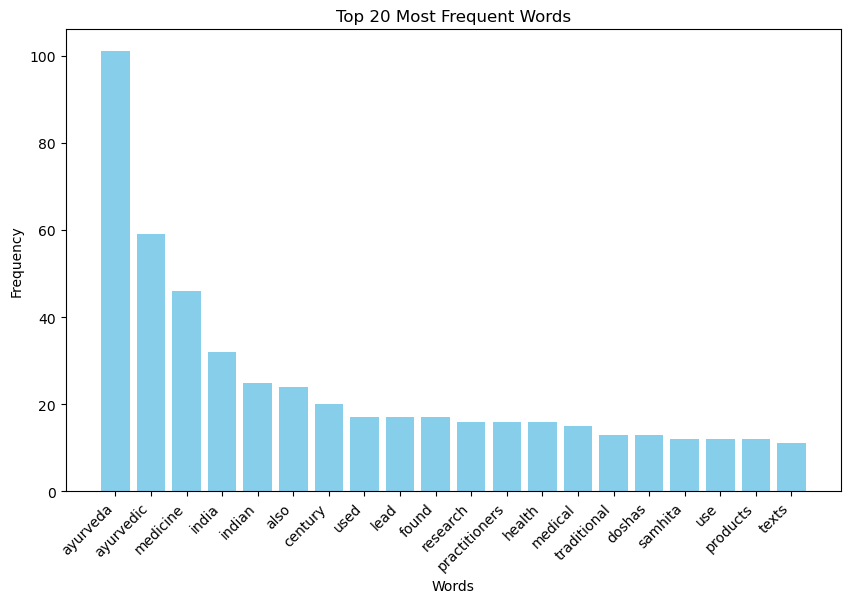

Word Frequency in  2  link provided to me

[('ayurveda', 101), ('ayurvedic', 59), ('medicine', 46), ('india', 32), ('also', 27), ('indian', 25), ('python', 20), ('used', 20), ('century', 20), ('use', 17), ('lead', 17), ('found', 17), ('research', 16), ('practitioners', 16), ('health', 16), ('using', 15), ('medical', 15), ('traditional', 13), ('doshas', 13), ('samhita', 12)]




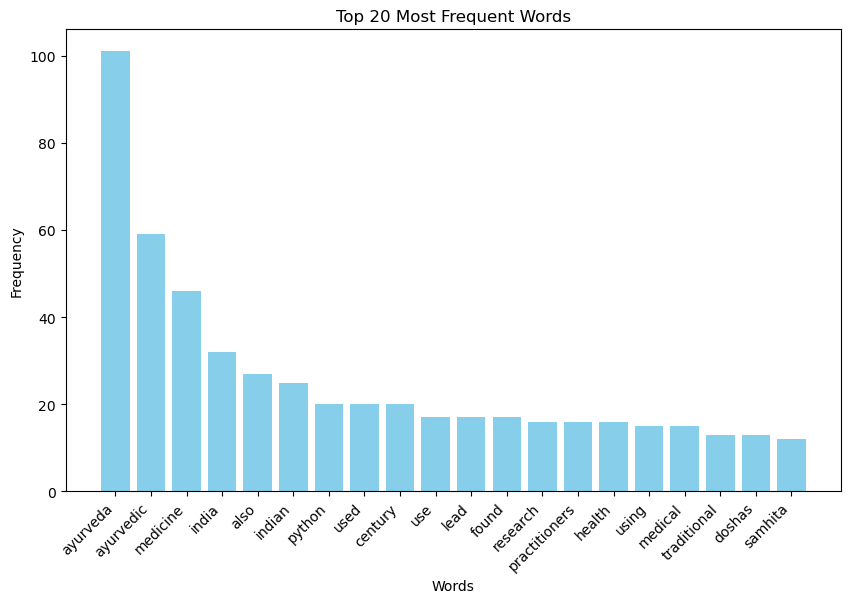

In [90]:
paragraph  = ''' '''
for i in range(0,len(bodyDataList)):
    print('Word Frequency in ',i+1,' link provided to me')
    print()
    for j in range(0,len(bodyDataList[i])):
       data = (bodyDataList[i][j])
       newdata = data.get_text()
       paragraph  = newdata +paragraph 
    tokens = word_tokenize(paragraph )
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    word_freq = Counter(tokens)

    #------------------------------------to get the top 20 in data set in frequency--------------------------------------
    
    top_20_in_data = word_freq.most_common(20)   
    print(top_20_in_data)
    print()
    print()

    words, counts = zip(*top_20_in_data)
    plt.figure(figsize=(10,6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Frequent Words')
    plt.show()    